### Applied Machine Learning Project - Our Aim is to gain some insights from the given data set and build a Content recommendation model and perform clustering 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.cm as cm

# Libraries for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Libraries for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harithajampani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('/Users/harithajampani/Downloads/Project 3_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.shape

(7787, 12)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
df.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
df['director'] = df['director'].fillna('Unknown')
df['director'].isnull().sum()

0

In [11]:
df['cast'] = df['cast'].fillna('Unknown')
df['cast'].isnull().sum()

0

In [12]:
df['country'] = df['country'].fillna('Unknown')
df['country'].isnull().sum()

0

In [13]:
df = df.dropna(subset=['date_added','rating'])

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df.shape

(7770, 12)

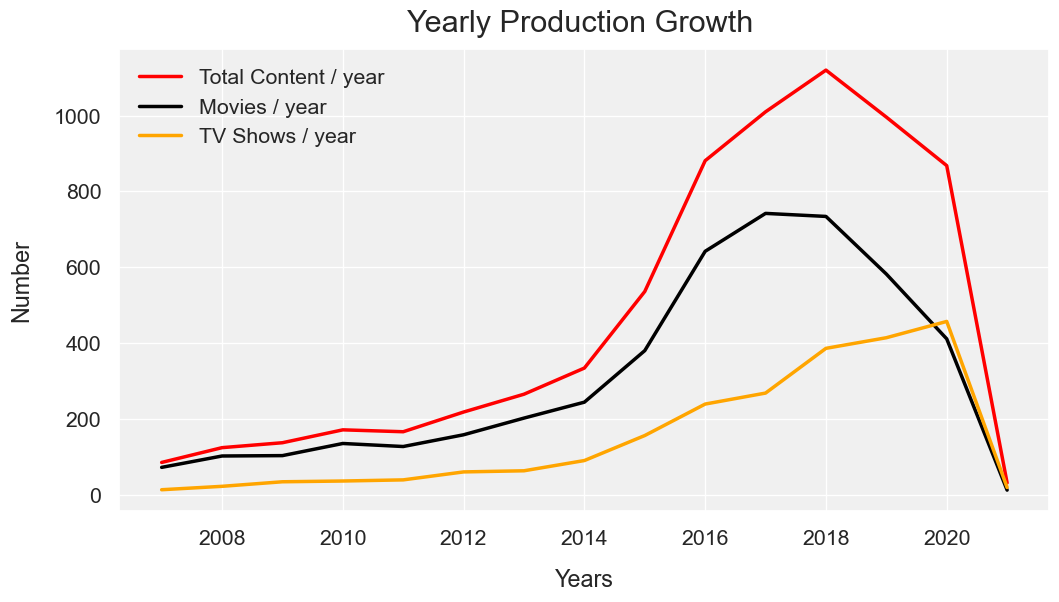

In [16]:
movies_yearly=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
shows_yearly=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='red',label="Total Content / year")
movies_yearly.plot(figsize=(12, 6), linewidth=2.5, color='black',label="Movies / year",ms=3)
shows_yearly.plot(figsize=(12, 6), linewidth=2.5, color='Orange',label="TV Shows / year")
plt.gca().set_facecolor('#f0f0f0')
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Yearly Production Growth ", y=1.02, fontsize=22);
     

In [17]:
df.country.nunique()

682

In [18]:
df.country.value_counts().rename_axis('Country').reset_index(name='count')

,Country,count
0,United States,2546
1,India,923
2,Unknown,505
3,United Kingdom,396
4,Japan,224
...,...,...
677,"Russia, United States, China",1
678,"Italy, Switzerland, France, Germany",1
679,"United States, United Kingdom, Canada",1
680,"United States, United Kingdom, Japan",1


In [19]:
country_list=[]
tv_shows=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_shows.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_shows.count(i),movies.count(i)) for i in country_list]))
     

In [20]:
production_country[6:15]

[('Uruguay', 14, 1, 13),
 ('Mauritius', 1, 1, 0),
 ('Austria', 11, 1, 10),
 ('Mongolia', 1, 0, 1),
 ('Colombia', 45, 28, 17),
 ('Azerbaijan', 1, 1, 0),
 ('Norway', 29, 9, 20),
 ('Philippines', 78, 1, 77),
 ('Serbia', 7, 0, 7)]

In [21]:
df_country= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
df_country=df_country.sort_values('Productions',ascending=False)
df_country=df_country.reset_index()
df_country=df_country.drop('index',axis=1)
#Top 5
top_countries=df_country.head()
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Unknown,Canada
Productions,3288,990,722,505,412
TV-Shows,860,75,255,276,126
Movies,2428,915,467,229,286


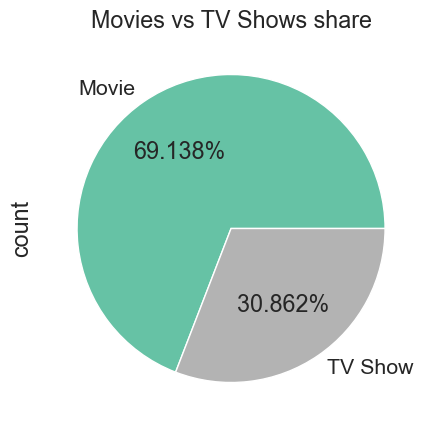

In [22]:
spread = df['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

spread.plot(kind = 'pie', autopct='%1.3f%%', cmap='Set2')
plt.title(f'Movies vs TV Shows share')
plt.show()

In [23]:
no_of_categories = ", ".join(df['listed_in']).split(", ")
no_of_categories[:5]   

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [24]:
len(no_of_categories)
len(set(no_of_categories))

42

In [25]:
count_per_category = {}
for category in set(no_of_categories):
  count_per_category[category] = no_of_categories.count(category)

In [26]:
count_per_category
sorted_count_per_category = sorted(count_per_category.items(), key=lambda x: x[1])
sorted_count_per_category[-10:]

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [27]:
top_10_most_occurred_categories = sorted_count_per_category[-10:]
     
top_10_most_occurred_categories

top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])
     

<Figure size 1600x800 with 0 Axes>

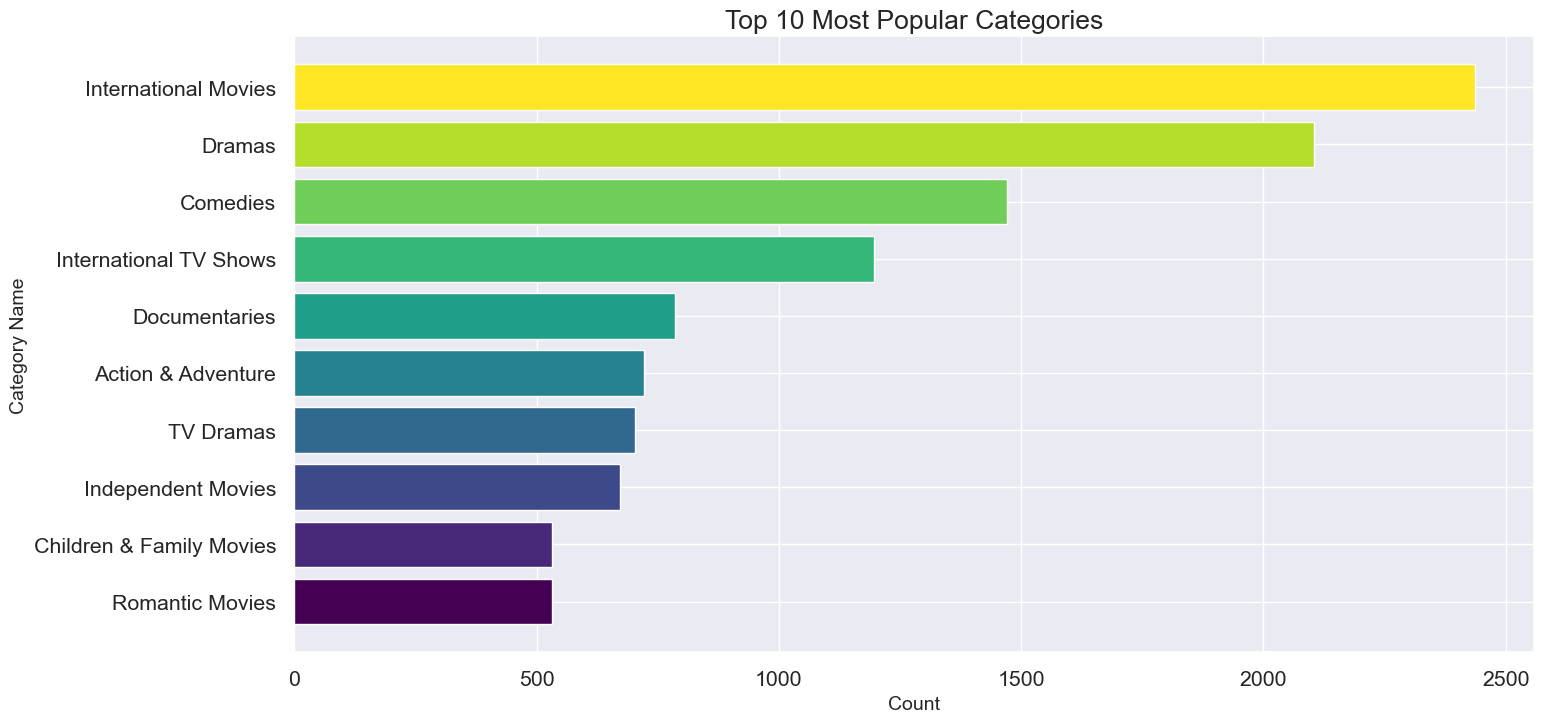

<Figure size 1600x800 with 0 Axes>

In [28]:
plt.figure( figsize = (16,8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_most_occurred_category_name)))
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= colors)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

In [29]:
df['month_of_date_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df[['date_added' , 'month_of_date_added']].head()

,date_added,month_of_date_added
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [30]:
month_df=df['month_of_date_added'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

,month_of_date_added,count
0,December,816
1,October,780
2,January,745
3,November,730
4,March,660
5,September,613
6,August,611
7,April,595
8,July,592
9,June,538


# Text Preprocessing

In [31]:
df['tag'] = df['description'] + ' ' + df['rating'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['cast']

In [32]:
print(df['tag'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


In [33]:
#Lower casing
def to_lower(x):
  return x.lower()

df['tag'] = df['tag'].apply(to_lower)
print(df['tag'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


In [34]:
# Removing Punctuations
def to_remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

df['tag'] = df['tag'].apply(to_remove_punctuation)

print(df['tag'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [35]:
# Remove URLs & Remove words and digits contain digits
df['tag'] = df['tag'].str.replace(r'\w*\d\w*', '', regex=True)
print(df['tag'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [36]:
# Remove Stopwords
stop_words = nltk.corpus.stopwords.words('english')

def to_remove_stop_words(x):
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

df['tag'] = df['tag'].apply(to_remove_stop_words)

print(df['tag'][0])
     

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [37]:
# Remove White spaces in 'tags' column
df['tag'] = df['tag'].str.strip()

print(df['tag'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [38]:
# Tokenization
import nltk
nltk.download('punkt')

df['tag'] = df['tag'].apply(nltk.word_tokenize)

print(df['tag'][0])

temp_tags = df['tag']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harithajampani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'tvma', 'brazil', 'international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'joão', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zezé', 'motta', 'celso', 'frateschi']


In [39]:
#Stemming
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

df['tag'] = df['tag'].apply(stemming)

print(df['tag'][0])

futur elit inhabit island paradis far crowd slum get one chanc join save squalor tvma brazil intern tv show tv drama tv scifi fantasi joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [40]:
# POS Tagging
import nltk
nltk.download('averaged_perceptron_tagger')

df['tag'] = temp_tags.apply(nltk.pos_tag)

print(df['tag'][0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/harithajampani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('future', 'JJ'), ('elite', 'JJ'), ('inhabit', 'NN'), ('island', 'NN'), ('paradise', 'NN'), ('far', 'RB'), ('crowded', 'VBD'), ('slums', 'NNS'), ('get', 'VBP'), ('one', 'CD'), ('chance', 'NN'), ('join', 'NN'), ('saved', 'VBD'), ('squalor', 'JJ'), ('tvma', 'NN'), ('brazil', 'VBD'), ('international', 'JJ'), ('tv', 'NN'), ('shows', 'NNS'), ('tv', 'NN'), ('dramas', 'VBP'), ('tv', 'NN'), ('scifi', 'NN'), ('fantasy', 'NN'), ('joão', 'NN'), ('miguel', 'NN'), ('bianca', 'NN'), ('comparato', 'NN'), ('michel', 'NN'), ('gomes', 'NNS'), ('rodolfo', 'VBP'), ('valente', 'JJ'), ('vaneza', 'FW'), ('oliveira', 'NN'), ('rafael', 'NN'), ('lozano', 'NN'), ('viviane', 'NN'), ('porto', 'NN'), ('mel', 'NN'), ('fronckowiak', 'NN'), ('sergio', 'NN'), ('mamberti', 'NN'), ('zezé', 'NN'), ('motta', 'NN'), ('celso', 'NN'), ('frateschi', 'NN')]


In [41]:
def phrase(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

df['tag']=df['tag'].apply(phrase)

print(df['tag'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi 


In [42]:
# Vectorizing Text
tfidf_text = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)

tfidf_text.fit(df['tag'])

dictionary = tfidf_text.vocabulary_.items()

In [43]:
encoded_vector = tfidf_text.transform(df['tag']).toarray()
print(encoded_vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
print(tfidf_text.get_feature_names_out())

['aakash' 'aamir' 'aaron' ... 'özge' 'ünlüoğlu' 'şahin']


In [45]:
vec_df=pd.DataFrame(encoded_vector)
vec_df

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.151457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7768,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dimensionality Reduction

In [46]:
pca = PCA(random_state=32)
pca.fit(encoded_vector)

PCA(random_state=32)

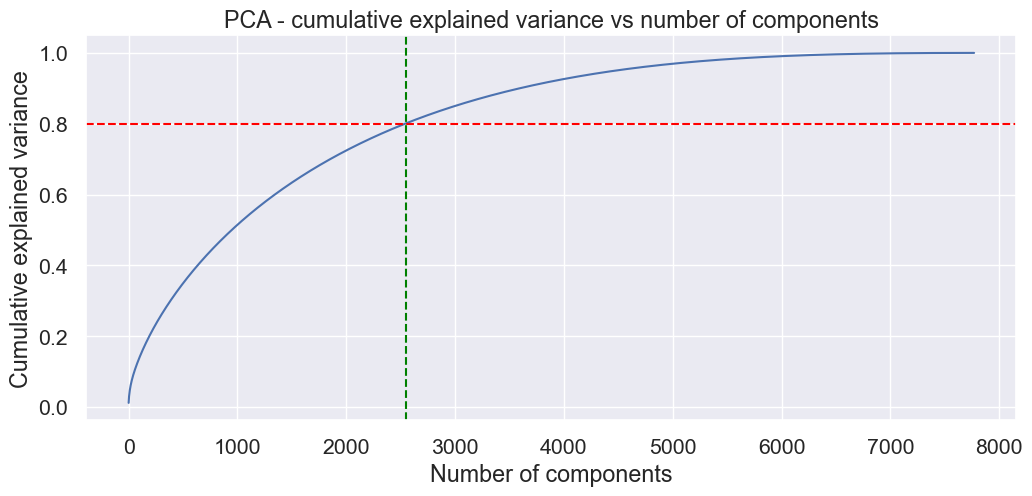

In [47]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2550, color='green', linestyle='--')

# Display chart
plt.show()

In [48]:
# Reducing the dimensions to 2550 using pca
pca = PCA(n_components=2550, random_state=32)
pca.fit(encoded_vector)

PCA(n_components=2550, random_state=32)

In [49]:
V = pca.transform(encoded_vector)

## Clustering Model -1 K-Means

/Users/harithajampani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/harithajampani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/harithajampani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/harithajampani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

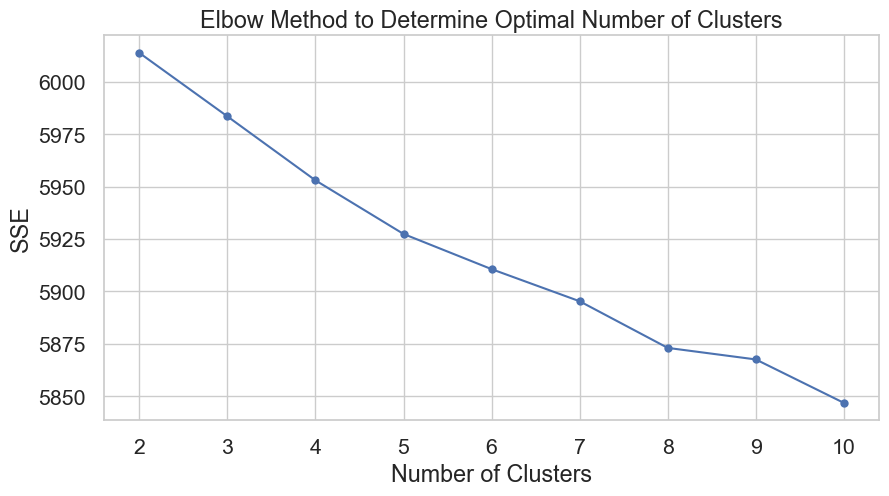

In [102]:
model_1 = KMeans()
visualizer = KElbowVisualizer(model_1, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

sse = []
k_range = range(2, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(V)
    sse.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center

plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [103]:
kmean=KMeans(n_clusters=5)

# Fit the data to the KMean cluster
kmean.fit(V)

# Predict on the model
y_kmean=kmean.predict(V)

/Users/harithajampani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [104]:
df["K_means_cluster"]=y_kmean
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_of_date_added,tag,K_means_cluster,Agglo_cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,future elite inhabit island paradise far crowd...,4,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,devastating earthquake hits mexico city trappe...,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,army recruit found dead fellow soldiers forced...,0,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,postapocalyptic world ragdoll robots hide fear...,1,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,brilliant group students become cardcounting e...,1,0


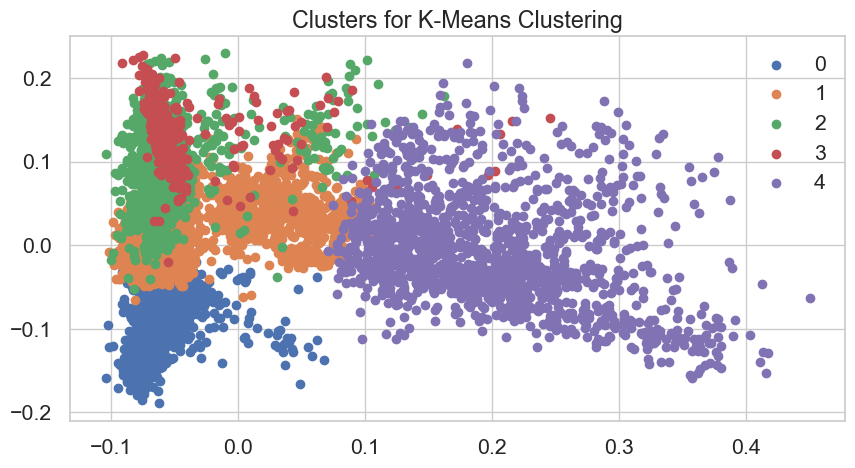

In [105]:
u_labels = np.unique(y_kmean)

plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(V[y_kmean == i , 0] ,V[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()


plt.show()

In [106]:
def extract_unique_genres_per_cluster(df, cluster_col='K_means_cluster', genre_col='listed_in'):
    # Dictionary to hold the unique genres for each cluster
    genres_per_cluster = {}

    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        # Get the cluster number for this row
        cluster = row[cluster_col]
        # Get the list of genres for this row, split by comma and strip whitespace
        genres = [genre.strip() for genre in row[genre_col].split(',')]
        # If the cluster hasn't been added to the dictionary, add it with an empty set
        if cluster not in genres_per_cluster:
            genres_per_cluster[cluster] = set()
        # Add the genres for this row to the cluster's set
        genres_per_cluster[cluster].update(genres)

    # Convert the sets to lists for easier reading/manipulation
    for cluster in genres_per_cluster:
        genres_per_cluster[cluster] = sorted(list(genres_per_cluster[cluster]))

    return genres_per_cluster

# Use the function on the example DataFrame
unique_genres_per_cluster = extract_unique_genres_per_cluster(df)

unique_genres_per_cluster



{4: ['Anime Series',
  'British TV Shows',
  'Classic & Cult TV',
  'Crime TV Shows',
  'Docuseries',
  'International TV Shows',
  "Kids' TV",
  'Korean TV Shows',
  'Reality TV',
  'Romantic TV Shows',
  'Science & Nature TV',
  'Spanish-Language TV Shows',
  'Stand-Up Comedy & Talk Shows',
  'TV Action & Adventure',
  'TV Comedies',
  'TV Dramas',
  'TV Horror',
  'TV Mysteries',
  'TV Sci-Fi & Fantasy',
  'TV Shows',
  'TV Thrillers',
  'Teen TV Shows'],
 0: ['Action & Adventure',
  'Anime Features',
  'Children & Family Movies',
  'Classic Movies',
  'Comedies',
  'Cult Movies',
  'Documentaries',
  'Dramas',
  'Faith & Spirituality',
  'Horror Movies',
  'Independent Movies',
  'International Movies',
  'International TV Shows',
  'LGBTQ Movies',
  'Movies',
  'Music & Musicals',
  'Romantic Movies',
  'Sci-Fi & Fantasy',
  'Sports Movies',
  'TV Shows',
  'Thrillers'],
 1: ['Action & Adventure',
  'Anime Features',
  'Anime Series',
  'British TV Shows',
  'Children & Family Mov

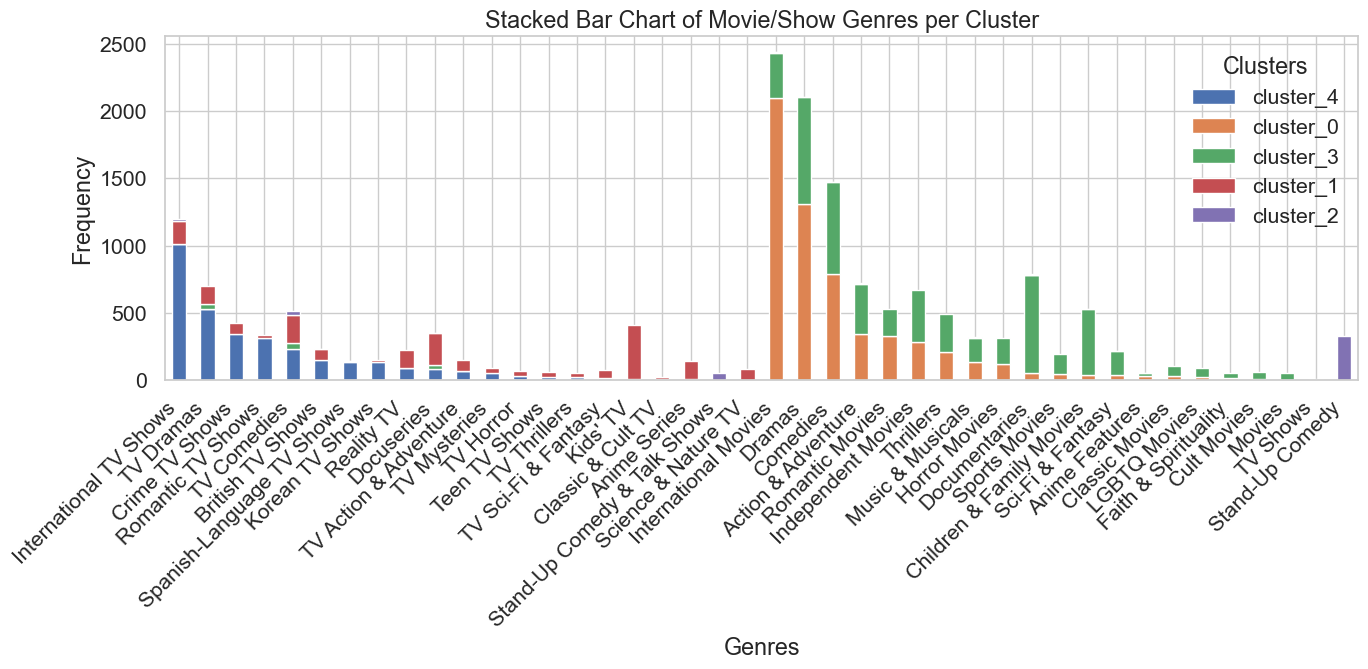

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the stacked bar chart
genre_counts_per_cluster.plot(kind='bar', stacked=True, figsize=(14, 7))

# Add titles and labels
plt.title('Stacked Bar Chart of Movie/Show Genres per Cluster')
plt.xlabel('Genres')
plt.ylabel('Frequency')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the legend
plt.legend(title='Clusters')

# Show the plot
plt.tight_layout()
plt.show()


In [108]:
# For each cluster, create a DataFrame that counts the occurrences of each genre
for cluster in unique_genres_per_cluster.keys():
    # Filter the DataFrame for the current cluster and expand the 'listed_in' column into a list of genres
    cluster_genres = df[df['K_means_cluster'] == cluster]['listed_in'].str.split(', ').explode()
    
    # Create a table of genre counts
    genre_table = cluster_genres.value_counts().reset_index()
    genre_table.columns = ['Genre', 'Count']
    
    # Display the cluster number and the table
    print(f"Cluster {cluster} genres table:")
    display(genre_table)


Cluster 4 genres table:


,Genre,Count
0,International TV Shows,1105
1,TV Dramas,585
2,Crime TV Shows,414
3,Romantic TV Shows,327
4,TV Comedies,296
5,British TV Shows,222
6,Docuseries,210
7,Korean TV Shows,150
8,Spanish-Language TV Shows,144
9,Reality TV,122


Cluster 0 genres table:


,Genre,Count
0,International Movies,2016
1,Dramas,1316
2,Comedies,785
3,Romantic Movies,330
4,Action & Adventure,308
5,Independent Movies,287
6,Thrillers,206
7,Music & Musicals,131
8,Horror Movies,120
9,Children & Family Movies,42


Cluster 1 genres table:


,Genre,Count
0,Dramas,786
1,Comedies,682
2,Children & Family Movies,466
3,Action & Adventure,409
4,Independent Movies,386
5,Kids' TV,319
6,Thrillers,285
7,Romantic Movies,201
8,Horror Movies,190
9,TV Comedies,188


Cluster 2 genres table:


,Genre,Count
0,Documentaries,757
1,International Movies,255
2,Music & Musicals,114
3,Sports Movies,95
4,Docuseries,82
5,Reality TV,31
6,LGBTQ Movies,27
7,Children & Family Movies,24
8,Science & Nature TV,19
9,Classic Movies,12


Cluster 3 genres table:


,Genre,Count
0,Stand-Up Comedy,329
1,Stand-Up Comedy & Talk Shows,47
2,TV Comedies,33
3,International TV Shows,13
4,Music & Musicals,6
5,Docuseries,3
6,Documentaries,2
7,British TV Shows,1
8,Comedies,1
9,Dramas,1


## Model -2  Agglomerative Clustering

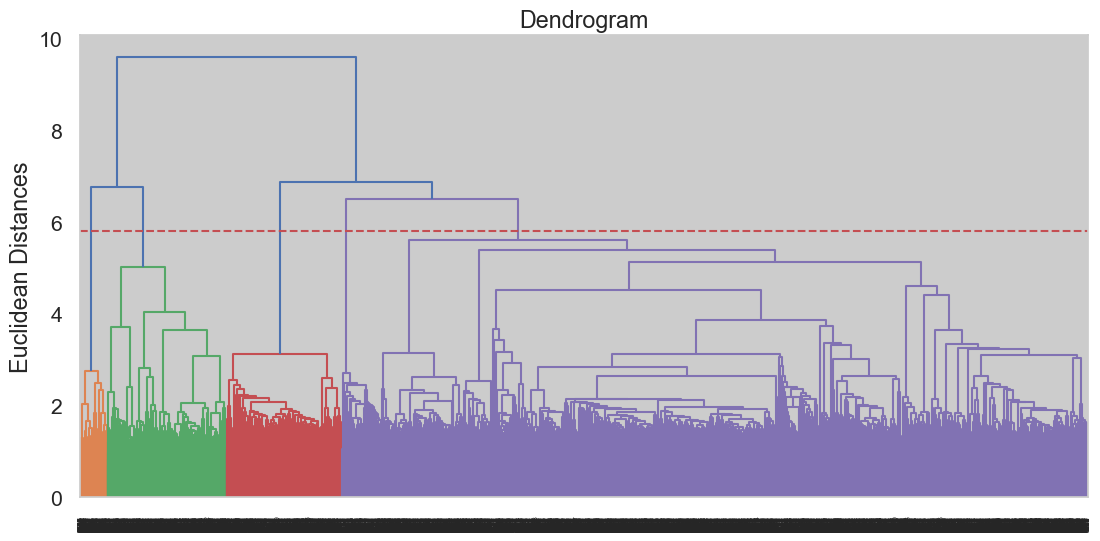

In [73]:
plt.figure(figsize=(13,6))
dendrogram_agg = sch.dendrogram(sch.linkage(V, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

In [74]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

agg.fit(V)

y_hc=agg.fit_predict(V)

/Users/harithajampani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/harithajampani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [75]:
df["Agglo_cluster"]=y_hc
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_of_date_added,tag,K_means_cluster,Agglo_cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,future elite inhabit island paradise far crowd...,4,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,devastating earthquake hits mexico city trappe...,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,army recruit found dead fellow soldiers forced...,0,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,postapocalyptic world ragdoll robots hide fear...,3,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,brilliant group students become cardcounting e...,3,0


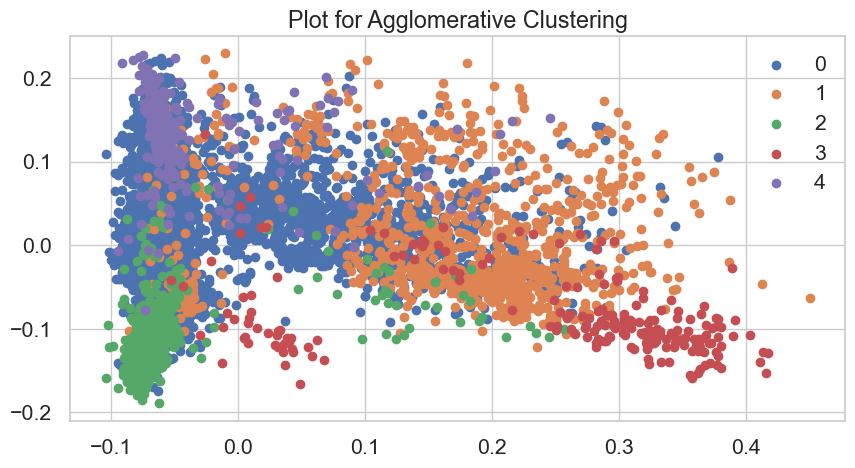

In [76]:
u_labels = np.unique(y_hc)

plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(V[y_hc == i , 0] ,V[y_hc == i , 1] , label = i)
plt.title('Plot for Agglomerative Clustering')
plt.legend()

plt.show()

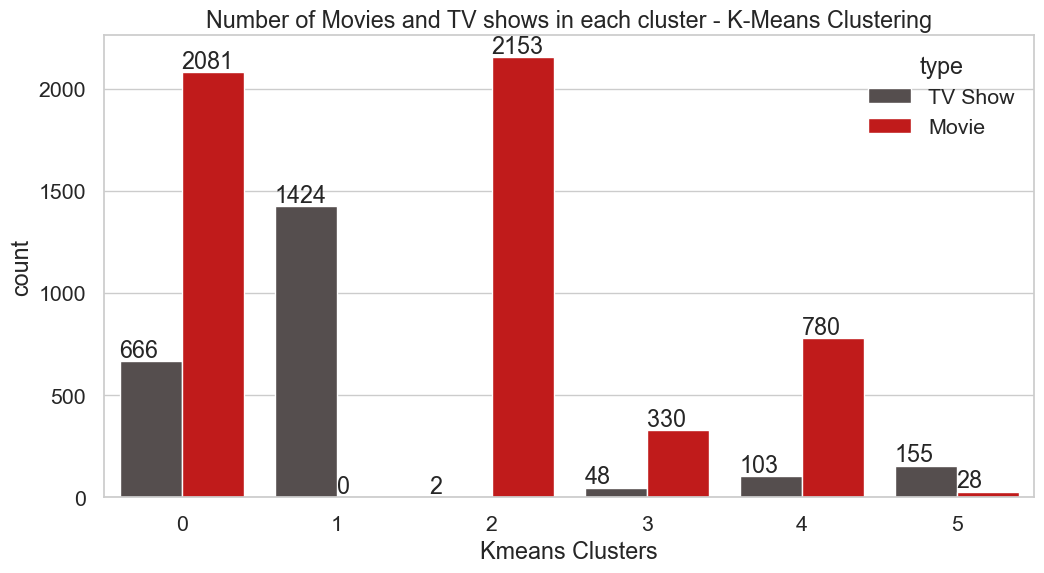

In [100]:
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_means_cluster',data=df, hue='type', palette=['#564d4d', '#db0000'])
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')
     

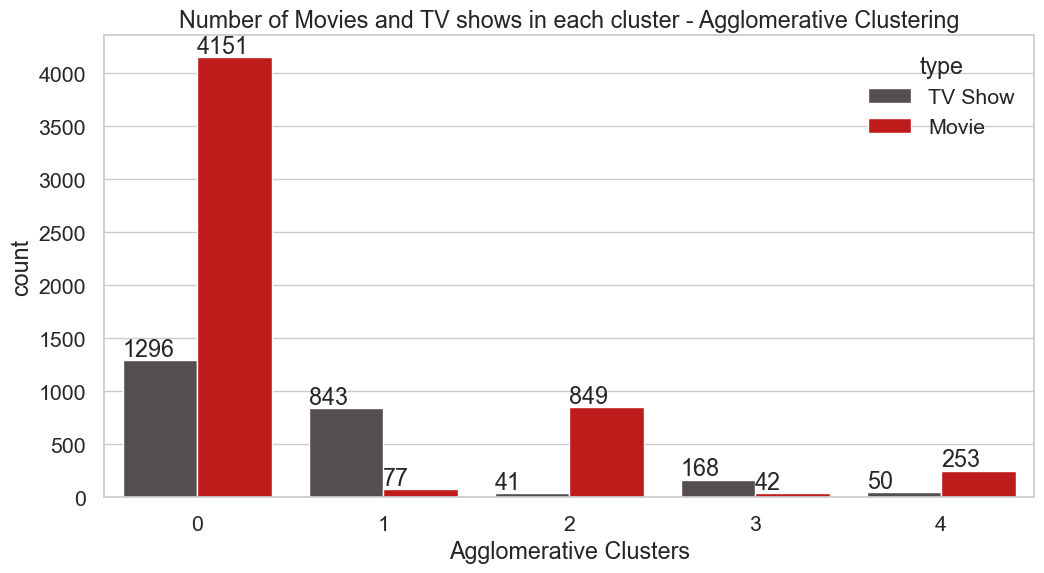

In [101]:
plt.figure(figsize=(12,6))
graph = sns.countplot(x='Agglo_cluster',data=df, hue='type', palette=['#564d4d', '#db0000'])
plt.title('Number of Movies and TV shows in each cluster - Agglomerative Clustering')
plt.xlabel('Agglomerative Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')
     

## Content based Recommendation

In [79]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))
filled_na=df.fillna('')

In [80]:
def create_tag_rec(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [81]:
filled_na['tag'] = filled_na.apply(create_tag_rec, axis=1)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filled_na['tag'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [93]:
filled_na = filled_na.reset_index(drop=True)
indices = pd.Series(filled_na.index, index=filled_na['title'])

In [94]:
def get_movie_recommendations(title, cosine_sim=cosine_sim):
    try:
        index = indices[title]
        similarity_scores = list(enumerate(cosine_sim[index]))

        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        similarity_scores = similarity_scores[1:11]  # Get the top 10 similar movies, excluding the first one which is the movie itself

        movie_indices = [i[0] for i in similarity_scores]
        return df['title'].iloc[movie_indices]
    except KeyError:
        return f"Didn't find any matches for '{title}'. Browse other popular TV shows and movies."


In [95]:
get_movie_recommendations('Inception', cosine_sim)

562                               Apollo 18
1851           Dragonheart: A New Beginning
3                                         9
6479    The Imaginarium of Doctor Parnassus
2858                               Hulk Vs.
5700                           Solomon Kane
2070                             Extinction
6932                              The Titan
44                                 Æon Flux
6155                        The Book of Eli
Name: title, dtype: object

In [96]:
get_movie_recommendations('Thor: Ragnarok', cosine_sim)

635                    Avengers: Infinity War
2866                Hunt for the Wilderpeople
1408                      Clash of the Titans
2858                                 Hulk Vs.
3046                                       IO
6155                          The Book of Eli
7208                   Tremors 2: Aftershocks
1852    Dragonheart: Battle for the Heartfire
3567                              Left Behind
2979                                Inception
Name: title, dtype: object

In [97]:
get_movie_recommendations('Evvarikee Cheppoddu', cosine_sim)

6078        The American Game
5386             Santo Cachón
5522                 Sex Doll
7706                Yes or No
4597             Okafor's Law
7760                Zaki Chan
1259    Chadi Jawani Budhe Nu
2079          Eyyvah Eyyvah 2
3816              Luka Chuppi
2341                Game Over
Name: title, dtype: object

In [98]:
get_movie_recommendations("Zindagi Na Milegi Dobara", cosine_sim)

1758         Dil Dhadakne Do
3808          Luck by Chance
7764                    Zero
49            10 jours en or
1724                   Dev.D
3524                 Lakshya
1737                     Dhh
5326             Saath Saath
1562                   Cycle
3281    Kabhi Haan Kabhi Naa
Name: title, dtype: object

In [99]:
get_movie_recommendations("I don't know", cosine_sim)

"Didn't find any matches for 'I don't know'. Browse other popular TV shows and movies."